In [1]:

%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy
import os

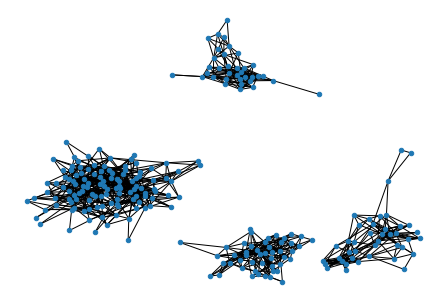

In [28]:
with open('data/example1.dat') as f:
    edges = [tuple([int(x) for x in line.strip().split(',')]) for line in f]
    
# Extract nodes
nodes = np.unique(np.asarray(edges))
num_nodes = nodes.shape[0]

# Visualize graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20))
plt.show()

>K-eigenvector algorithm

In [29]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0]-1, tup[1]-1] = 1
    
# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct the matrix L (called normalized laplacian)
D_ = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_, A), D_)

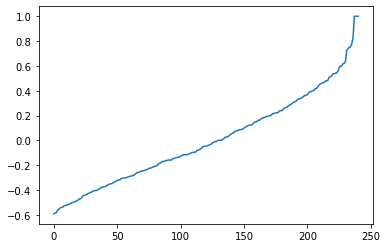

In [30]:
# Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
w, v = scipy.linalg.eigh(L)
plt.plot(w)
plt.show()

In [32]:

# Find optimal k (where the eigenvalues start dropping)
k = np.argmin(np.ediff1d(np.flipud(w))) + 1
print('k = %d' % k)

k = 4


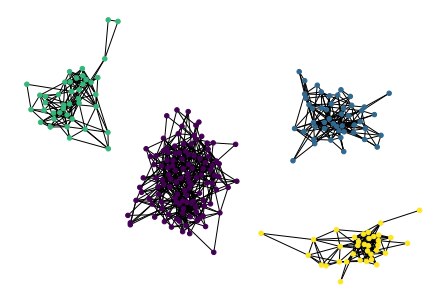

In [35]:

# Extract k largest eigenvectors
X = v[:, num_nodes - k:]

# Construct matrix Y by renormalizing X
Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

# Cluster rows of Y into k clusters using K-means 
kmeans = KMeans(n_clusters=k, random_state=1234).fit(Y)

# Assign original point i to the cluster of the row i of matrix Y
cluster_labels = kmeans.labels_
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)

>Find communities using the Fiedler Vector

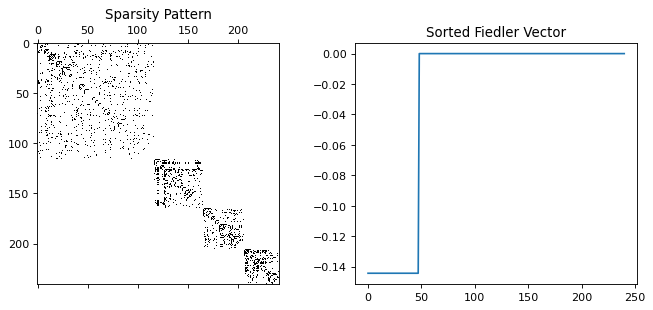

In [36]:
# Construct affinity matrix A
A = np.zeros([num_nodes, num_nodes])
for tup in edges:
    A[tup[0]-1, tup[1]-1] = 1
    
# Construct diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Construct Laplacian matrix L
L = D - A

# Get eigenvalues in ascending order
w, X = scipy.linalg.eigh(L) 

# Get Fiedler Vector: The eigenvector corresponding to second smallest eigenvalue of L
fv = X[:, 1]

# Plot the sparsity pattern and sorted fiedler vector
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('Sparsity Pattern')
plt.subplot(1,2,2)
plt.plot(np.sort(fv))
plt.title('Sorted Fiedler Vector')
plt.show()